In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import sys
sys.path.append('/Users/kaonpark/workspace/github.com/likejazz/kaon-learn')
import kaonlearn
from kaonlearn.plots import plot_decision_regions

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


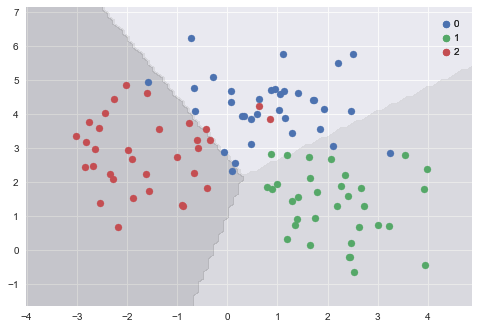

In [3]:
plot_decision_regions(X, y, logreg)

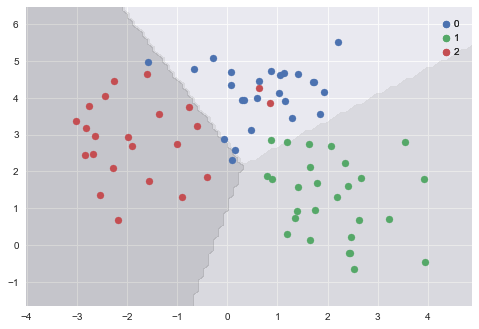

In [4]:
plot_decision_regions(X_train, y_train, logreg)

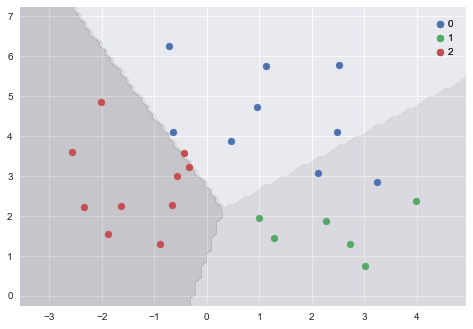

In [5]:
plot_decision_regions(X_test, y_test, logreg)

In [6]:
X_test

array([[ 1.28535145,  1.43691285],
       [ 0.94808785,  4.7321192 ],
       [ 3.00251949,  0.74265357],
       [-0.6700734 ,  2.26685667],
       [ 2.11567076,  3.06896151],
       [-2.56114686,  3.59947678],
       [-1.62535654,  2.25440397],
       [ 3.97820955,  2.37817845],
       [-2.02493646,  4.84741432],
       [-0.33887422,  3.23482487],
       [ 2.2635425 ,  1.8743027 ],
       [-0.42724442,  3.57314599],
       [-1.88089792,  1.54293097],
       [ 2.50904929,  5.7731461 ],
       [-0.57748321,  3.0054335 ],
       [ 1.12031365,  5.75806083],
       [-0.88677249,  1.30092622],
       [ 0.9845149 ,  1.95211539],
       [ 2.47034915,  4.09862906],
       [ 2.72756228,  1.3051255 ],
       [-0.73000011,  6.25456272],
       [-2.33031368,  2.22833248],
       [-0.63762777,  4.09104705],
       [ 3.2460247 ,  2.84942165],
       [ 0.4666179 ,  3.86571303]])

In [7]:
y_test

array([1, 0, 1, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 1, 0, 1, 0, 2, 0,
       0, 0])

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(logreg, X, y)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.88235294  0.84848485  0.90909091]


In [9]:
scores = cross_val_score(logreg, X, y, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.9047619   0.85714286  0.9047619   0.89473684  0.88888889]


In [10]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [11]:
print("Cross-validation scores:\n{}".format(
      cross_val_score(logreg, X, y, cv=kfold)))

Cross-validation scores:
[ 0.85  0.9   0.95  0.8   0.95]


In [12]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
      cross_val_score(logreg, X, y, cv=kfold)))

Cross-validation scores:
[ 0.88235294  0.93939394  0.84848485]


In [13]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
      cross_val_score(logreg, X, y, cv=kfold)))

Cross-validation scores:
[ 0.91176471  0.87878788  0.93939394]


In [14]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, X, y, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[ 0.84  0.88  0.9   0.86  0.9   0.86  0.86  0.92  0.94  0.9 ]


In [15]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Test set score: 0.88
Best parameters: {'C': 1, 'gamma': 1}
Best cross-validation score: 0.95


In [17]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [18]:
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000852,0.000425,0.36,0.359969,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",20,0.375,0.355932,...,0.333333,0.366667,0.357143,0.360656,0.357143,0.360656,0.000282,0.000171,0.015533,0.00396
1,0.000534,0.000262,0.36,0.359969,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",20,0.375,0.355932,...,0.333333,0.366667,0.357143,0.360656,0.357143,0.360656,0.000118,0.000056,0.015533,0.00396
2,0.000494,0.000230,0.36,0.359969,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",20,0.375,0.355932,...,0.333333,0.366667,0.357143,0.360656,0.357143,0.360656,0.000039,0.000014,0.015533,0.00396
3,0.000656,0.000321,0.36,0.359969,0.001,1,"{'C': 0.001, 'gamma': 1}",20,0.375,0.355932,...,0.333333,0.366667,0.357143,0.360656,0.357143,0.360656,0.000138,0.000082,0.015533,0.00396
4,0.000770,0.000402,0.36,0.359969,0.001,10,"{'C': 0.001, 'gamma': 10}",20,0.375,0.355932,...,0.333333,0.366667,0.357143,0.360656,0.357143,0.360656,0.000211,0.000159,0.015533,0.00396


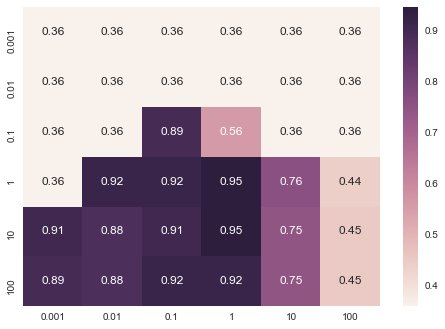

In [19]:
scores = np.array(results.mean_test_score).reshape(6, 6)
sns.heatmap(scores, xticklabels=param_grid['gamma'],
                      yticklabels=param_grid['C'], annot=True)

In [20]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [21]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.95


In [22]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
results.T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000600719,0.000883627,0.00111666,0.0011353,0.000996351,0.00113578,0.000873089,0.000591946,0.000497246,0.000456381,...,0.000386429,0.000453997,0.000532818,0.000525141,0.000346756,0.000330734,0.000304556,0.000306177,0.000330257,0.000708103
mean_score_time,0.000257683,0.000851917,0.000538158,0.000598478,0.000419283,0.000628805,0.000488091,0.0002985,0.000229931,0.000209188,...,0.000184202,0.000191832,0.000219202,0.000204468,0.000189781,0.000181198,0.00018549,0.000175571,0.000183487,0.000184298
mean_test_score,0.36,0.36,0.36,0.36,0.36,0.36,0.36,0.36,0.36,0.36,...,0.92,0.92,0.746667,0.453333,0.36,0.906667,0.893333,0.893333,0.893333,0.893333
mean_train_score,0.359969,0.359969,0.359969,0.359969,0.359969,0.359969,0.359969,0.359969,0.359969,0.359969,...,0.973382,0.976772,1,1,0.359969,0.913258,0.919981,0.936541,0.933319,0.946654
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
rank_test_score,25,25,25,25,25,25,25,25,25,25,...,3,3,19,22,25,7,10,10,10,10
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,1,0.9375,0.75,0.4375,0.375,0.9375,0.875,0.875,0.875,0.875


In [23]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 6  2  1]
 [ 0  6  0]
 [ 0  0 10]]


In [24]:
len(y_test)

25

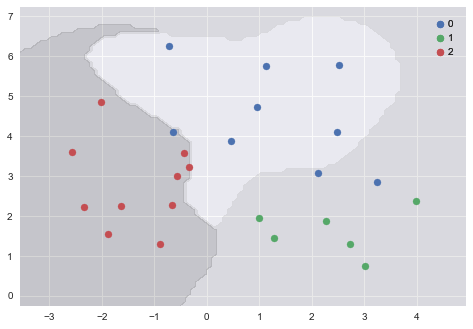

In [25]:
plot_decision_regions(X_test, y_test, grid_search)

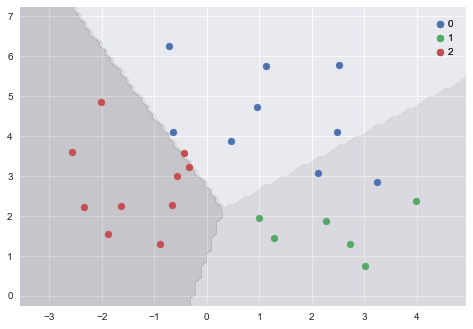

In [26]:
plot_decision_regions(X_test, y_test, logreg)

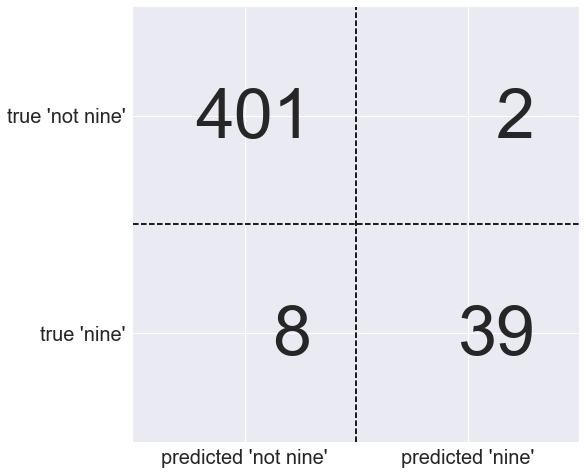

In [27]:
kaonlearn.plots.plot_confusion_matrix_illustration()

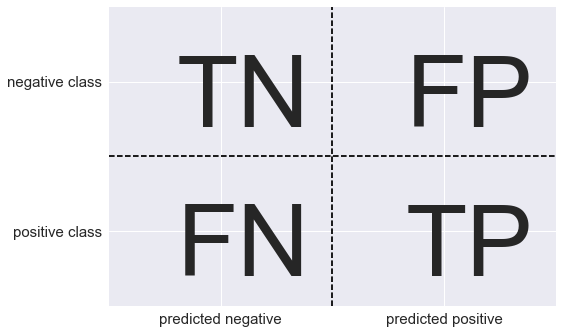

In [28]:
kaonlearn.plots.plot_binary_confusion_matrix()

We call correctly classified samples belonging to the positive class `true positives` and correctly classified samples belonging to the negative class `true negatives`. These terms are usually abbreviated FP, FN, TP, and TN and lead to the following interpretation for the confusion matrix

$ Accuracy = \frac{TP+TN}{TP+TN+FP+FN} $

$ Precision = \frac{TP}{TP+FP} $

$ Recall = \frac{TP}{TP+FN} $

$ F_1 = 2\frac{precision*recall}{precision+recall} $

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, grid_search.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      0.67      0.80         9
          1       0.75      1.00      0.86         6
          2       0.91      1.00      0.95        10

avg / total       0.90      0.88      0.87        25



In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg.predict(X_test)))

             precision    recall  f1-score   support

          0       0.88      0.78      0.82         9
          1       0.75      1.00      0.86         6
          2       1.00      0.90      0.95        10

avg / total       0.90      0.88      0.88        25



In [31]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


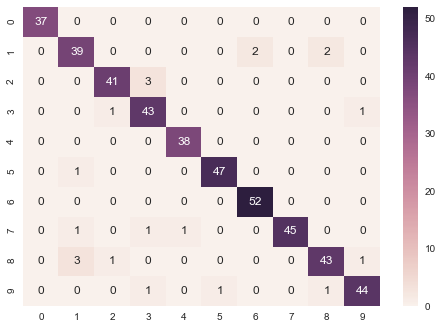

In [32]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

In [33]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450

